#### This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# Credit Card Users Churn Prediction

## Problem Statement

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

**You need to identify best possible model that will give the required performance**


## Data Description
* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio


#### What Is a Revolving Balance?

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


#### What is the Average Open to buy?

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### What is the Average utilization Ratio?

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


#### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### Importing Libraries

In [129]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Loading Data

In [2]:
churn = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
churn.shape

(10127, 21)

<IPython.core.display.Javascript object>

* The dataset has 10127 rows and 21 columns 

### Data Overview

In [4]:
# let's create a copy of the data
data = churn.copy()

<IPython.core.display.Javascript object>

In [5]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

In [6]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

* There are null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

- Education_Level has 15% missing values
- Marital_Status has 7% missing values

In [10]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


<IPython.core.display.Javascript object>

#### Observations:
* CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
* Customer_Age: Average age of customers is 46 years, age of customers has a wide range from 26 to 73 years.
* Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
* Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* Total_Relationship_Count: All customers use at least one product of the bank, whereas 75% of customers use 5 or fewer products of the bank.
* Months_Inactive_12_mon: On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity leads to churning of a customer.
* Contacts_Count_12_mon: On average bank and customers interacted twice in the past 12 months.
* Credit_Limit: There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal: Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.
* Avg_Open_To_Buy: Average amount that goes unused by the customers is 7469, the range is very wide for this variable and the extreme values(min and max) might be outliers.
* Total_Amt_Chng_Q4_Q1: For 75% of the customers the transaction amount in Q4 was less than the transaction amount in Q1 (as value is equal to ~0.9).
* Total_Trans_Amt: Average transaction amount of last 12 months is 4404, some customers spent as little as 510 while some customers made the transaction of more than 18k.
* Total_Trans_Ct: On average customers made 64 or fewer transactions while 75% of the customers made 81 transactions.
* Total_Ct_Chng_Q4_Q1: For 75% of the customers the number of transactions in Q4 was less than the transactions made in Q1.
* Avg_Utilization_Ratio: On average customers used ~27% of the available credit amount of their card, with 75% of the customers utilizing 50% or less of their available credit amount.

In [11]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

In [12]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Unique values in Gender are :
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Unique values in Education_Level are :
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Unique values in Marital_Status are :
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Unique values in Income_Category are :
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************

<IPython.core.display.Javascript object>

**Observations**
* Most of the records are for existing customers.
* Most of the bank's customers are female
* Most customers are graduates.
* Most customers are married.
* Most customers lie in the income group of less than $40k 
* Most customers have a blue card.
* The data is imbalanced

**Missing values**
* 'abc' value of Income_Category can be considered and treated as missing values.

## Data Pre-processing

In [13]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>


### Note: The EDA section of the notebook has been covered multiple times in the previous case studies. For this discussion, EDA section can be skipped and we can refer to the **<a href = #link>EDA summary</a>** below. For the detailed EDA, **<a href = #link1>Appendix Section</a>** can be referred. 

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [17]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [18]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<a id='eda'></a>
### <a id='link'>Summary of EDA</a>

* The dataset has 10127 rows and 21 columns. 
* There are null values in the Education_Level and Marital_Status
* 5 columns are of object type rest all are numerical.

**Data Cleaning**
* CLIENTNUM column consists of uniques ID for clients and hence will not add value to the modeling. This column has been dropped. 
* The target varaible is encoded to numeric. 
* Missing value imputation will be done after splitting the data.

**Univariate Analysis**



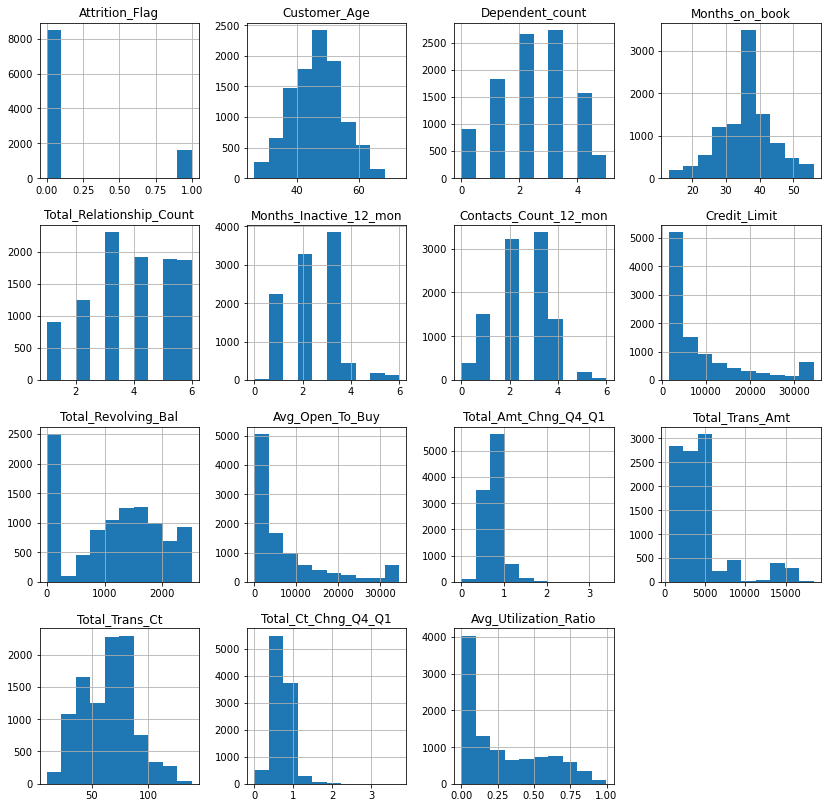

<IPython.core.display.Javascript object>

In [19]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

* `Customer_Age` : The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* `Dependent_count` :  Most customers are having 2 or 3 dependents.
* `Months_on_book` : Most customers are with the bank for 3 years.
* `Total_Relationship_Count` : Equal percentage of customers using 4,5 and 6 products might suggest that customers who opt or buy the 4th product will also be ready to buy more products.
* `Months_Inactive_12_mon` : Very few customers were inactive for more than 3 months.
* `Contacts_Count_12_mon` : Most of the customers interacted with the bank less than 4 times in the past 12 months.
* `Credit_Limit` : The distribution of the Credit_Limit is skewed to the right. There are quite a few customers with a maximum Credit Limit of 35000. 50% of the customers of the bank have a credit limit of less than <5000.
* `Total_Revolving_Bal` : Most customers pay the complete dues of credit card and have 0 revolving balance.
* `Avg_Open_To_Buy` : The distribution of the Avg_Open_To_Buy column is right-skewed. A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.
* `Total_Amt_Chng_Q4_Q1` : The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* `Total_Trans_Amt` : The distribution of Total_Trans_Amt is skewed to the right. There are two peaks in data at total transaction amounts of one around 2500 and the second around the mean value of ~4500.
* `Total_Trans_Ct` : The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.
* `Total_Ct_Chng_Q4_Q1` : The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* `Avg_Utilization_Ratio` : The distribution of Avg_Utilization_Ratio is skewed to the right. This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

Catergorical variables: 

* `Gender` : We have an almost equal percentage of Male and Female customers.
* `Education_Level` : 30.9% of the customers are graduates, followed by 19.9% of the customers who completed high school. Percentage of missing value in Education_Level column - 15%.
* `Marital_Status` : 46.3% of the customers are Married, followed by 38.9% of Single customers. Percentage of missing value in Marital_Status column - 7.4%.
* `Income_Category` : 35.2% of the customers lie in the Less than 40k income category group, followed by 17.7% of the customers in the 40k-60k income group. Percentage of missing value in Income_Category column - 11%.
* `Card_Category` : 93.2% of the customers have the Blue card. Blue card would be a standard card given by the bank to all its customers.

**Bivariate Analysis**

* Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
* There's a strong positive correlation between Months_on_book and Customer_Age, Total_Revolving_Bal and Avg_Utilization_Ratio, Total_Trans_Amt and Total_Trans_Ct.
* There's a negative correlation of Total_Relationship_count with Total_Trans_Amt and Total_Trans_Ct, Avg_Utilization_Ratio with Credit_Limit and Avg_Open_To_Buy.

**Attrition_Flag vs Gender**:
* There's not much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

**Attrition_Flag vs Marital_Status**:
* There's not much difference in attrition percentages for Marital_Status.
* ~20% of Singles, Divorced attrite.
* Married customers attrite the least.

**Attrition_Flag vs Education_Level**: 
* Customers with higher education -  Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.

**Attrition_Flag vs Income_Category**: 
* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

**Attrition_Flag vs Card_Category**:
* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

**Attrition_Flag vs Contacts_Count_12_mon**:
* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

**Attrition_Flag vs Months_Inactive_12_mon**:
* As inactivity increases attrition also increases (2-4 months)
* The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

**Attrition_Flag vs Total_Relationship_Count**:
* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

**Attrition_Flag vs Dependent_count**:
* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

**Attrition_Flag vs Credit_Limit**:
* Customers with lower credit limits are the ones who attrited.

**Attrition_Flag vs Total_Revolving_Bal**:


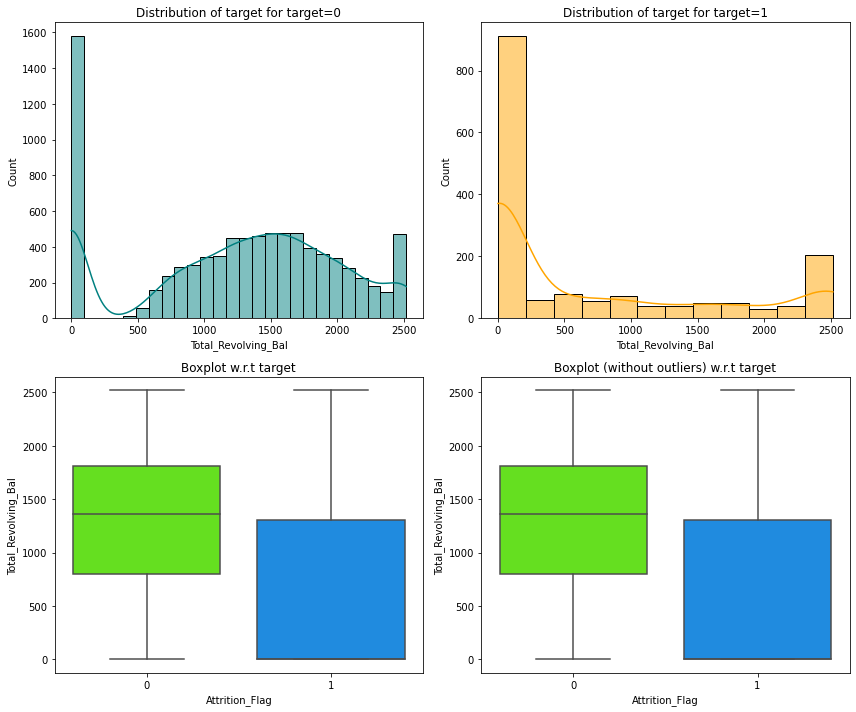

<IPython.core.display.Javascript object>

In [20]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service.

**Attrition_Flag vs Avg_Open_To_Buy**:
* There's not much difference in the distribution for an attrited and existing customer.

**Attrition_Flag vs Total_Trans_Ct**:


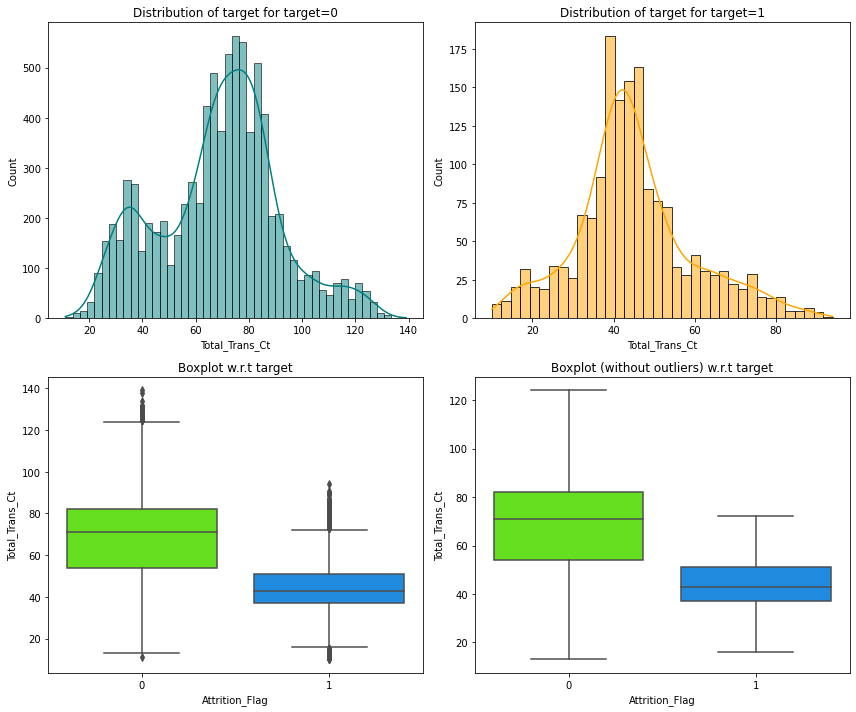

<IPython.core.display.Javascript object>

In [21]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* Less number of transactions lead to higher attrition.
* Customers with less than 80 to 100 transactions (or median transactions equal to 40) in a year should be more focused upon.

**Attrition_Flag vs Total_Trans_Amt**:


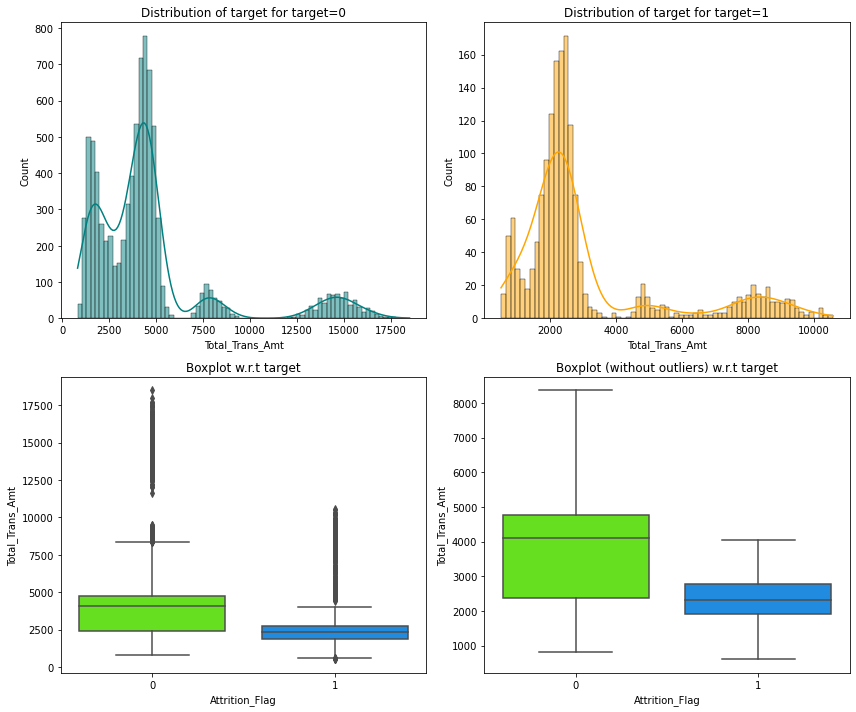

<IPython.core.display.Javascript object>

In [22]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* Less number of transactions might lead to a less transaction amount and eventually leading to customer attrition.

**Attrition_Flag vs Total_Amt_Chng_Q4_Q1**:
* Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

**Attrition_Flag vs Total_Ct_Chng_Q4_Q1**:

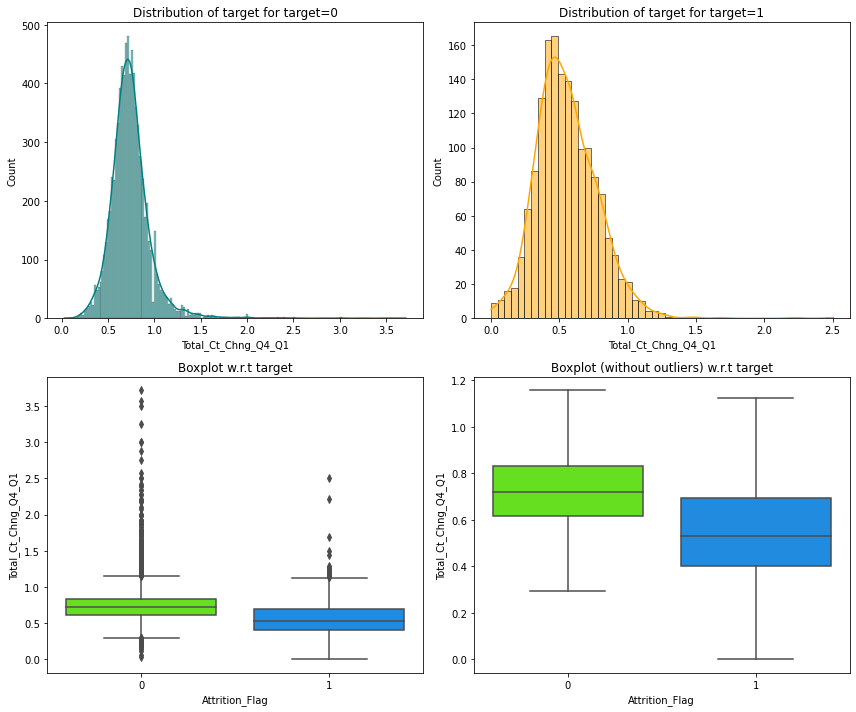

<IPython.core.display.Javascript object>

In [23]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

**Attrition_Flag vs Avg_Utilization_Ratio**:


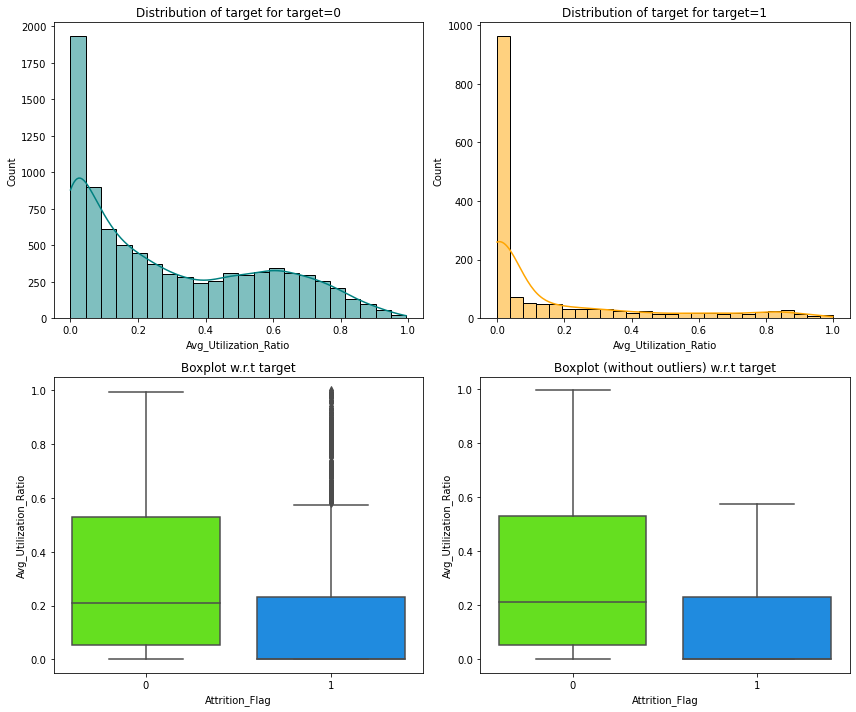

<IPython.core.display.Javascript object>

In [24]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* Customers utilizing their full credit limit are the ones who didn't attrite. 
* Less utilization of the available credits indicates inactivity of customers.

### Let's find the percentage of outliers, in each column of the data, using IQR.

In [25]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [26]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Attrition_Flag             16.066
Customer_Age                0.020
Dependent_count             0.000
Months_on_book              3.812
Total_Relationship_Count    0.000
Months_Inactive_12_mon      3.268
Contacts_Count_12_mon       6.211
Credit_Limit                9.717
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             9.509
Total_Amt_Chng_Q4_Q1        3.910
Total_Trans_Amt             8.848
Total_Trans_Ct              0.020
Total_Ct_Chng_Q4_Q1         3.891
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

* After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario (in age, the total amount of transactions, number of transactions, etc) and we would want our model to learn the underlying pattern for such customers.

### Missing value imputation
- We will first replace 'abc' values with 'np.nan' in Income_Category
- We will impute missing values in all 3 columns using mode

In [27]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [28]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [29]:
data1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

* Values have been replaced.

In [30]:
imputer = SimpleImputer(strategy="most_frequent")

<IPython.core.display.Javascript object>

In [31]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [32]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<IPython.core.display.Javascript object>

In [33]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

In [34]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [35]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

* All missing values have been treated.

In [36]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [37]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1095
M     931
Name: Gender, dtype: int64
******************************
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
******************************
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
******************************
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
******************************
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [38]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3193
M    2882
Name: Gender, dtype: int64
******************************
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
******************************
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
******************************
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

### Encoding categorical variables

In [39]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

* After encoding there are 29 columns.

In [40]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

## Building the model

## Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a customer will attrite and the customer doesn't attrite
2. Predicting a customer will not attrite and the customer attrites

### Which case is more important? 
* Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset. 

### How to reduce this loss i.e need to reduce False Negatives?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [41]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [42]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Model with original data

In [43]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.4354508196721312
Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.4723926380368098
Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
Xgboost: 0.8834355828220859
dtree: 0.8159509202453987


<IPython.core.display.Javascript object>

### Performance comparison
- Xgboost has the best performance on the validation followed by GBM and Adaboost


## Models with Oversampled data

In [44]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [45]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.8350656991566974
Bagging: 0.9974504804863699
Random forest: 1.0
GBM: 0.980976662090606
Adaboost: 0.9690135320651108
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8251533742331288
Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
GBM: 0.8926380368098159
Adaboost: 0.901840490797546
Xgboost: 0.8987730061349694
dtree: 0.8251533742331288


<IPython.core.display.Javascript object>

### Performance comparison
- Adaboost has the best performance on validation followed by XGB

## Models with Undersampled data

In [46]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [47]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [48]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.8227459016393442
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8282208588957055
Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
Xgboost: 0.9570552147239264
dtree: 0.9202453987730062


<IPython.core.display.Javascript object>

### Performance comparison
- Adaboost has the best performance followed by Xgboost as per the validation performance

## Which models should be tuned?
- XGBoost, AdaBoost and Gradient boosting models have consistent and good performance for all 3 datasets.
- So, we will tune these 3 models.
- We will tune these 3 models using undersampled data as it is giving better results
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data

## Tuning XGBoost

### Tuning with Undersampled data

In [49]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.980559916274202:
Wall time: 31.5 s


<IPython.core.display.Javascript object>

In [50]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [51]:
# Checking model's performance on train set
xgb1_train = model_performance_classification_sklearn(
    tuned_xgb1, X_train_un, y_train_un
)
xgb1_train

,Accuracy,Recall,Precision,F1
0,0.912,1.000,0.851,0.919


<IPython.core.display.Javascript object>

In [52]:
# Checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
xgb1_val

,Accuracy,Recall,Precision,F1
0,0.818,0.988,0.469,0.636


<IPython.core.display.Javascript object>

### Tuning with Original data

In [53]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.9405442176870749:
Wall time: 1min 10s


<IPython.core.display.Javascript object>

In [54]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=10,
    n_estimators=200,
    learning_rate=0.01,
    gamma=1,
)
tuned_xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [55]:
# Checking model's performance on training set
xgb2_train = model_performance_classification_sklearn(tuned_xgb2, X_train, y_train)
xgb2_train

,Accuracy,Recall,Precision,F1
0,0.946,0.999,0.749,0.856


<IPython.core.display.Javascript object>

In [56]:
# Checking model's performance on validation set
xgb2_val = model_performance_classification_sklearn(tuned_xgb2, X_val, y_val)
xgb2_val

,Accuracy,Recall,Precision,F1
0,0.930,0.960,0.710,0.816


<IPython.core.display.Javascript object>

## Tuning Adaboost

### Tuning with Undersampled data

In [57]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.949811616954474:
Wall time: 12.3 s


<IPython.core.display.Javascript object>

In [58]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [59]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


<IPython.core.display.Javascript object>

In [60]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.935,0.963,0.725,0.827


<IPython.core.display.Javascript object>

### Tuning with Original data

In [61]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8647409733124019:
Wall time: 30.2 s


<IPython.core.display.Javascript object>

In [62]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

<IPython.core.display.Javascript object>

In [63]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.992,0.967,0.982,0.975


<IPython.core.display.Javascript object>

In [64]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_val, y_val)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.969,0.871,0.934,0.902


<IPython.core.display.Javascript object>

## Tuning Gradient Boosting Classifier

### Tuning with Undersampled Data

In [65]:
%%time 

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9559497645211932:
Wall time: 13 s


<IPython.core.display.Javascript object>

In [66]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [67]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.996,0.998,0.995,0.996


<IPython.core.display.Javascript object>

In [68]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.947,0.954,0.770,0.852


<IPython.core.display.Javascript object>

### Tuning with Original data

In [69]:
%%time 

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8544897959183672:
Wall time: 32.8 s


<IPython.core.display.Javascript object>

In [70]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [71]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.964,0.998,0.819,0.900


<IPython.core.display.Javascript object>

In [72]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.947,0.954,0.770,0.852


<IPython.core.display.Javascript object>

## Model Performance comparison

In [73]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb1_train.T,
        xgb2_train.T,
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.912,0.946,0.996,0.964,1.000,0.992
Recall,1.000,0.999,0.998,0.998,1.000,0.967
Precision,0.851,0.749,0.995,0.819,1.000,0.982
F1,0.919,0.856,0.996,0.900,1.000,0.975


<IPython.core.display.Javascript object>

In [74]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [xgb1_val.T, xgb2_val.T, gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T], axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.818,0.930,0.947,0.947,0.935,0.969
Recall,0.988,0.960,0.954,0.954,0.963,0.871
Precision,0.469,0.710,0.770,0.770,0.725,0.934
F1,0.636,0.816,0.852,0.852,0.827,0.902


<IPython.core.display.Javascript object>

- Gradient boosting model trained with original data has generalised performance, so let's consider it as the best model.

In [75]:
# Let's check the performance on test set
gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.975,0.914,0.931,0.922


<IPython.core.display.Javascript object>

- The model has given good performance on test set.

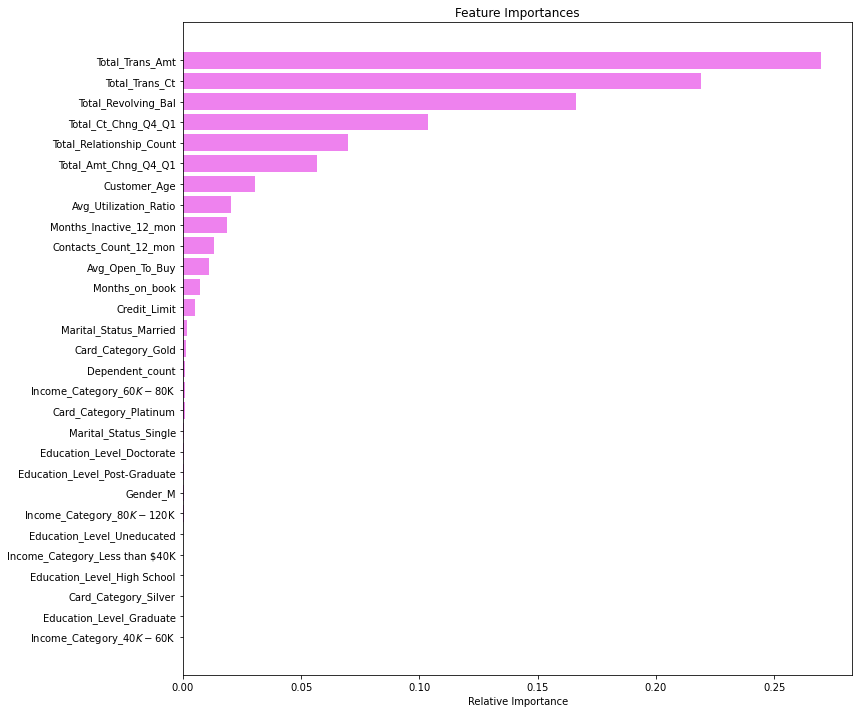

<IPython.core.display.Javascript object>

In [76]:
feature_names = X_train.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Total_Trans_Amt is the most important variable in predicting credit card churn followed by Total_Revolving_Bal, Total_Trans_Ct, Total_Relationship_Count, and Total_Ct_Chng_Q4_Q1.

## Let's use Column Transformer to build the final model

- We will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [77]:
# creating a list of numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



<IPython.core.display.Javascript object>

In [78]:
# Separating target variable and other variables
X = churn.drop(columns="Attrition_Flag")
Y = churn["Attrition_Flag"]

<IPython.core.display.Javascript object>

- Let's first do some basic pre-processing

In [79]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
X.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [80]:
X["Income_Category"].replace("abc", np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [81]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

- Now we already know the best model we need to process with, so we don't need to divide data into 3 parts

In [82]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


<IPython.core.display.Javascript object>

In [83]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "GBM",
            GradientBoostingClassifier(
                random_state=1,
                subsample=0.7,
                n_estimators=125,
                max_features=0.7,
                learning_rate=0.2,
                init=AdaBoostClassifier(random_state=1),
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
             

<IPython.core.display.Javascript object>

## Business Recommendations

* We have been able to build a predictive model:

  a) that bank can deploy this model to identify customers who are at the risk of attrition.
  
  b) that the bank can use to find the key causes that drive attrition. 
  
  c) based on which bank can take appropriate actions to build better retention policies for customers.
  

* Factors that drive the attrition - Total_Trans_Ct, Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count
* Total_Trans_Ct: Less number of transactions in a year leads to attrition of a customer - to increase the usage of cards the bank can provide offers like cashback, special discounts on the purchase of something, etc so that customers feel motivated to use their cards.

* Total_Revolving_Bal: Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service. After the customer has cleared the dues bank can ask for feedback on their experience and get to the cause of attrition.

* Total_Trans_Amt: Less number of transactions can lead to less transaction amount and eventually leads to customer attrition - Bank can provide offers on the purchase of costlier items which in turn will benefit the customers and bank both.

* Total_Relationship_Count: Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition - Bank should investigate here to find the problems customers are facing with these products, customer support, or more transparency can help in retaining customers.

* Female customers should be the target customers for any kind of marketing campaign as they are the ones who utilize their credits, make more and higher amount transactions. But their credit limit is less so increasing the credit limit for such customers can profit the bank.

* Months_Inactive: As inactivity increases the attrition also increases, 2-4 months of inactivity are the biggest contributors of attrition -Bank can send automated messages to engage customers, these messages can be about their monthly activity, new offers or services, etc.

* Highest attrition is among the customers who interacted/reached out the most with/to the bank, This indicates that the bank is not able to resolve the problems faced by customers leading to attrition - a feedback collection system can be set up to check if the customers are satisfied with the resolution provided, if not, the bank should act upon it accordingly.

## <a id='link1'>Appendix</a>

## EDA

### Univariate analysis

In [84]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Customer_Age

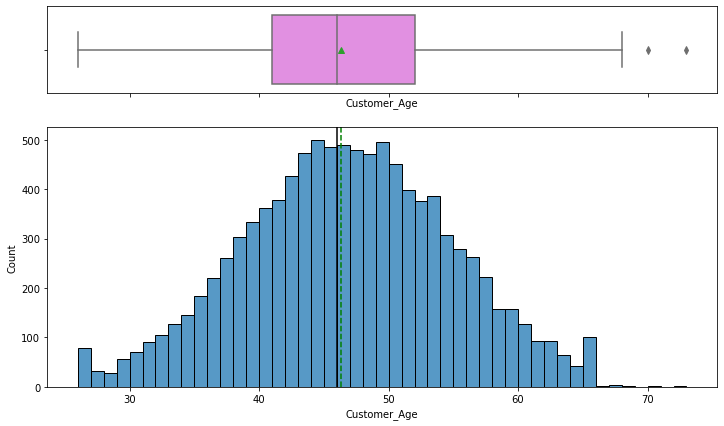

<IPython.core.display.Javascript object>

In [85]:
histogram_boxplot(data, "Customer_Age")

* The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* From the boxplot, we can see that there are a few outliers.

### Observations on Months_on_book

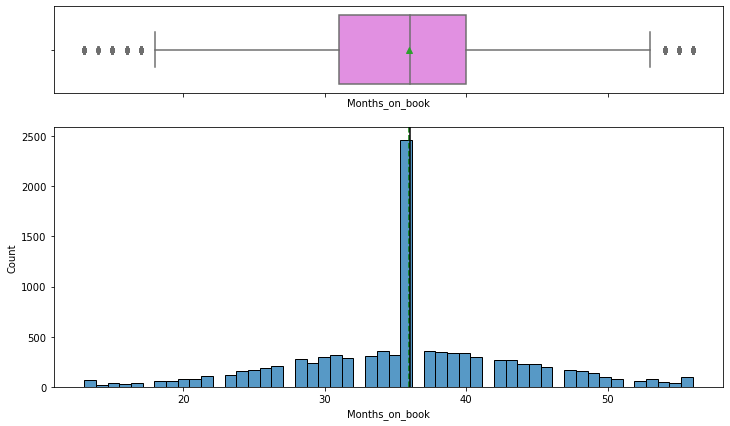

<IPython.core.display.Javascript object>

In [86]:
histogram_boxplot(data, "Months_on_book")

* Most customers are with the bank for 3 years.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Credit_Limit

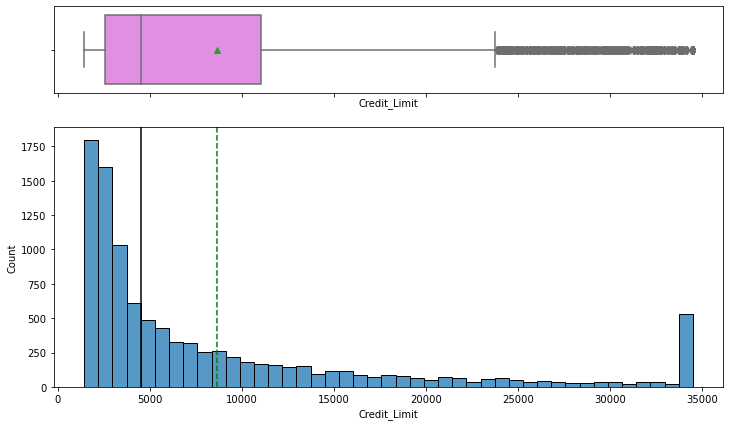

<IPython.core.display.Javascript object>

In [87]:
histogram_boxplot(data, "Credit_Limit")

* The distribution of the Credit_Limit is skewed to the right.
* There are quite a few customers with a maximum Credit Limit of 35000.
* 50% of the customers of the bank have a credit limit of less than <5000.

### Observations on Total_Revolving_Bal

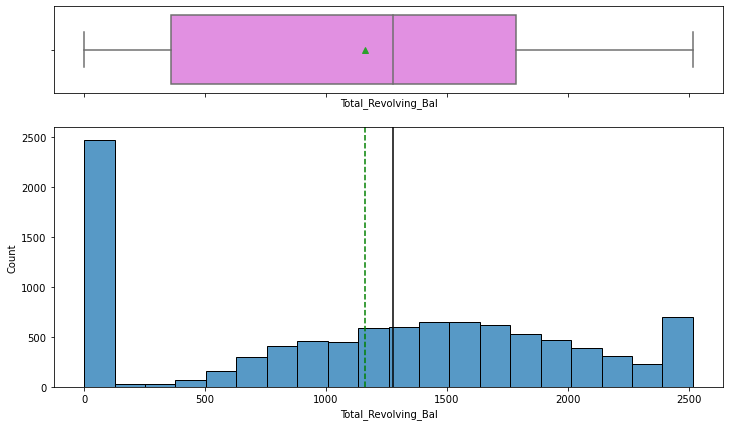

<IPython.core.display.Javascript object>

In [88]:
histogram_boxplot(data, "Total_Revolving_Bal")

* Most customers pay the complete dues of credit card and have 0 revolving balance.
* There are quite a few customers with a revolving balance of 2500.

### Observations on Avg_Open_To_Buy

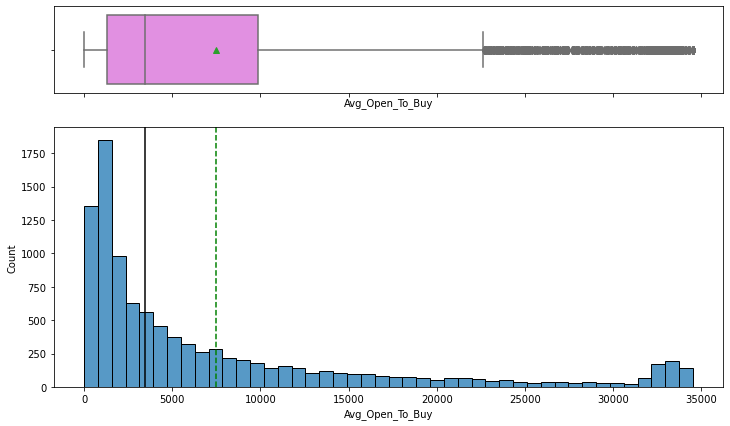

<IPython.core.display.Javascript object>

In [89]:
histogram_boxplot(data, "Avg_Open_To_Buy")

* The distribution of the Avg_Open_To_Buy column is right-skewed.
* A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.

### Observations on Total_Trans_Ct

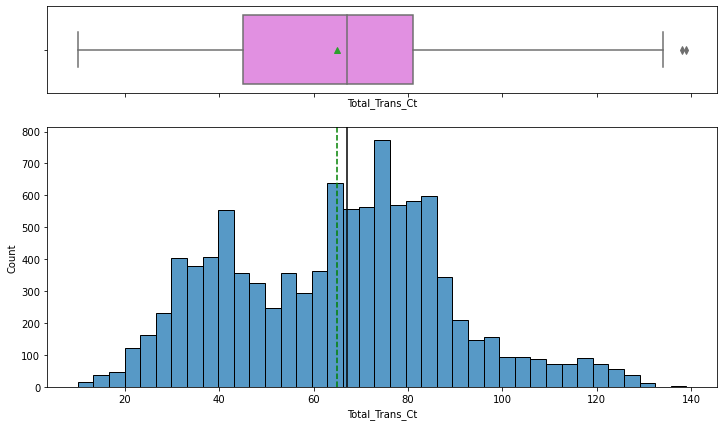

<IPython.core.display.Javascript object>

In [90]:
histogram_boxplot(data, "Total_Trans_Ct")

* The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

### Observations on Total_Amt_Chng_Q4_Q1

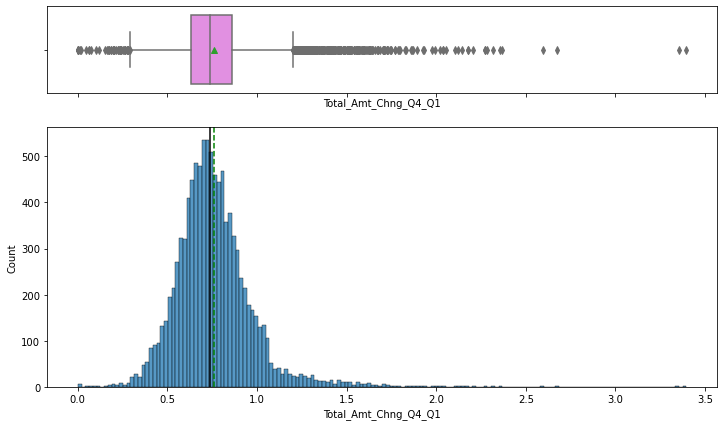

<IPython.core.display.Javascript object>

In [91]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

* The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Total_Trans_Amt

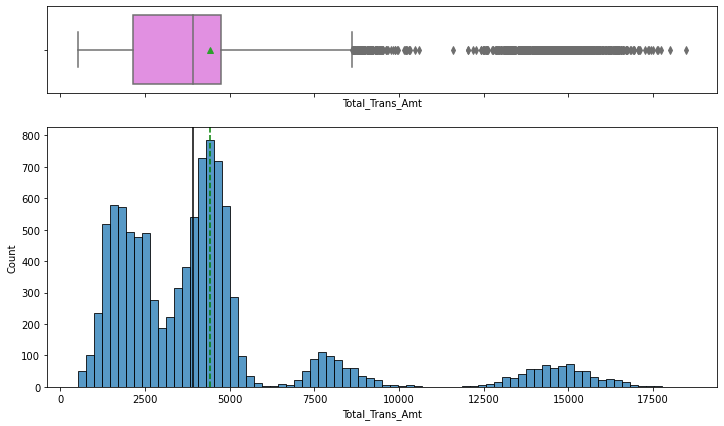

<IPython.core.display.Javascript object>

In [92]:
histogram_boxplot(data, "Total_Trans_Amt")

* The distribution of Total_Trans_Amt is skewed to the right.
* There are two peaks in data at total transaction amounts of one around 2500 and the second around the mean value of ~4500.
* From the boxplot, we can see that there are outliers - customers with more than ~8000 total transaction amounts are being considered as outliers.
* It would be interesting to check if the customers spending less with the card are the ones churning or the ones spending more are churning, if the latter is the case then there is a problem for the bank as it is losing valuable customers.

### Observations on Total_Ct_Chng_Q4_Q1

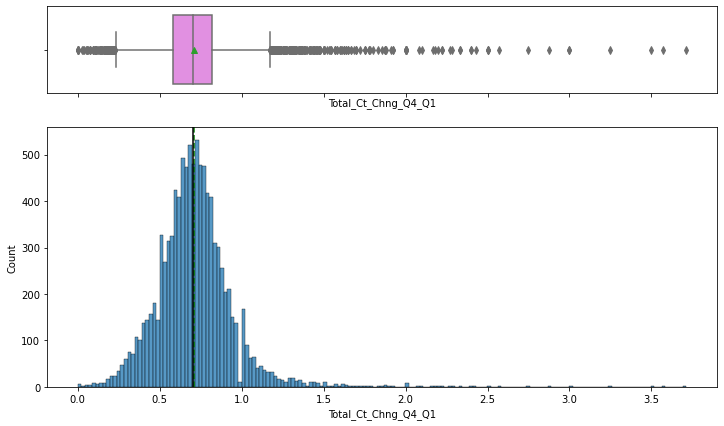

<IPython.core.display.Javascript object>

In [93]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

* The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

### Observations on Avg_Utilization_Ratio

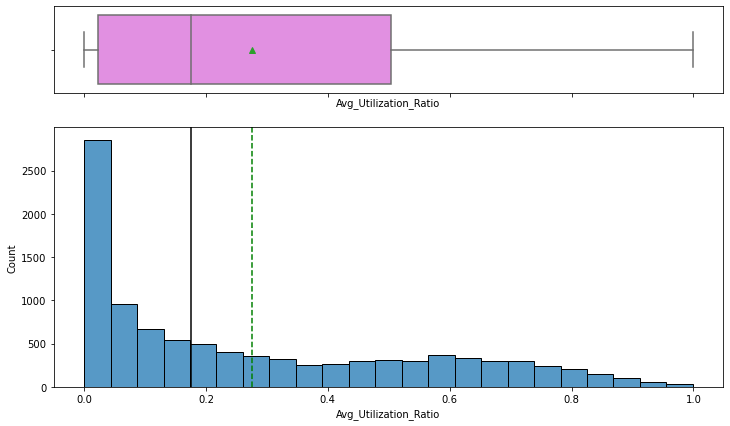

<IPython.core.display.Javascript object>

In [94]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

* The distribution of Avg_Utilization_Ratio is skewed to the right.
* This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

**Credit limit, Average open to buy and Average utilization ratio are right-skewed**

1. Open to buy means how much credit a customer is left with
   * Low values of Open to buy could represent either
       * Customers have low credit limits
       * Customers are spending a lot so they are left less open to buy
       

2. Average utilization ratio = (1 - (open to buy/credit limit))
   * Low values of the Average utilization ratio represents
        * (Open to buy/credit limit) is nearly equal to 1 -> Open to buy is nearly equal to the credit limit -> customers are spending less using their credit cards

3. Credit limit is also right-skewed which represents - most of the customers have low credit limits
 

Looking at the 3 variables, we can conclude that most of the customers have low credit limits and are not utilizing their credit cards much

Now this statement justifies the right skewness for all 3 variables

In [95]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on Dependent_count

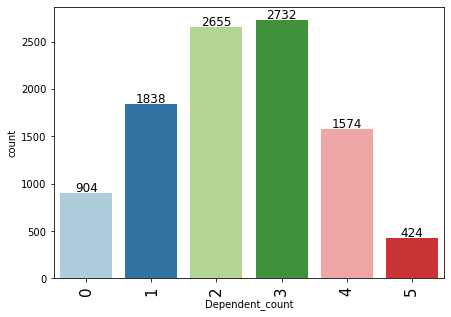

<IPython.core.display.Javascript object>

In [96]:
labeled_barplot(data, "Dependent_count")

* The distribution of dependents is very realistic with most customers having 2 or 3 dependents.

### Observations on Total_Relationship_Count

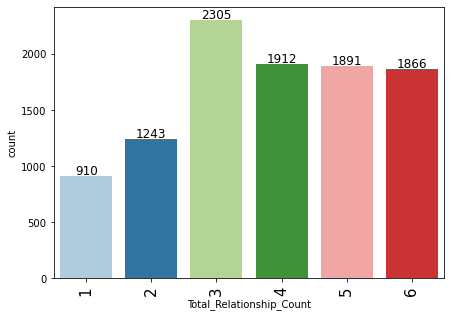

<IPython.core.display.Javascript object>

In [97]:
labeled_barplot(data, "Total_Relationship_Count")

* 22.8% of the customers are using 3 products offered by the bank while an equal percentage ~19% of customers use 4 or more than 4 products.
* Equal percentage of customers using 4,5 and 6 products might suggest that customers who opt or buy the 4th product will also be ready to buy more products.

### Observations on Months_Inactive_12_mon

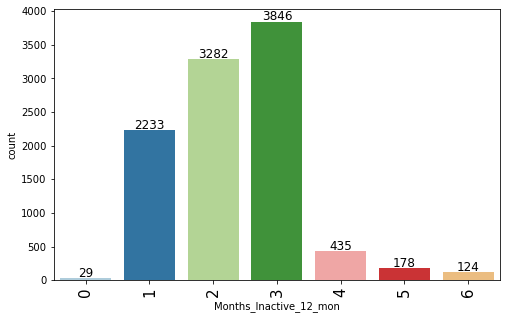

<IPython.core.display.Javascript object>

In [98]:
labeled_barplot(data, "Months_Inactive_12_mon")

* Only 7.5% of the customers were inactive for more than 3 months.

### Observations on Contacts_Count_12_mon

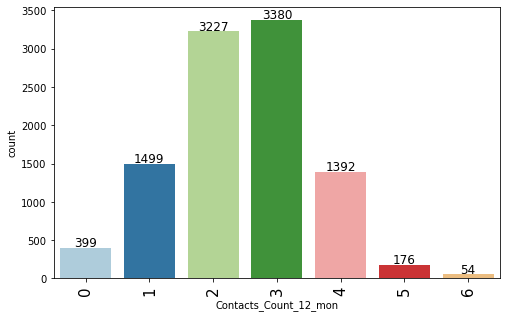

<IPython.core.display.Javascript object>

In [99]:
labeled_barplot(data, "Contacts_Count_12_mon")

* ~16% of the customers interacted with the bank more than 3 times in the past 12 months.

### Observations on Gender

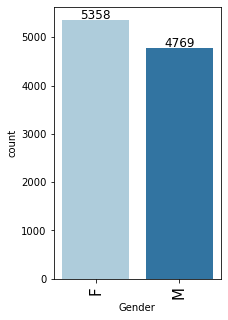

<IPython.core.display.Javascript object>

In [100]:
labeled_barplot(data, "Gender")

* We have an almost equal percentage of Male and Female customers.

### Observations on Education_Level

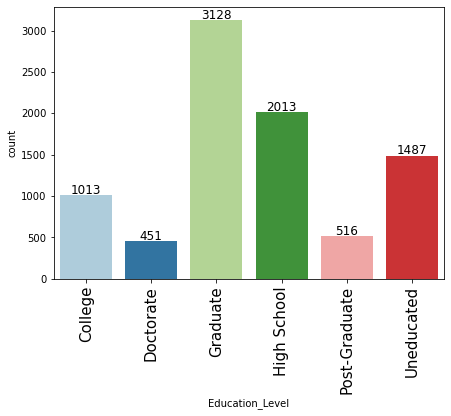

<IPython.core.display.Javascript object>

In [101]:
labeled_barplot(data, "Education_Level")

* 30.9% of the customers are graduates, followed by 19.9% of the customers who completed high school.
* Percentage of missing value in Education_Level column - 15%.

### Observations on Marital_Status

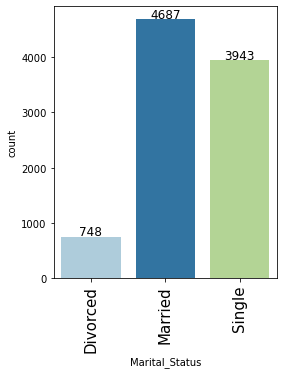

<IPython.core.display.Javascript object>

In [102]:
labeled_barplot(data, "Marital_Status")

* 46.3% of the customers are Married, followed by 38.9% of Single customers.
* Percentage of missing value in Marital_Status column - 7.4%.

### Observations on Income_Category

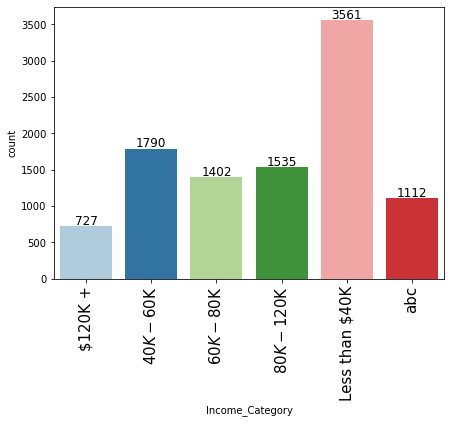

<IPython.core.display.Javascript object>

In [103]:
labeled_barplot(data, "Income_Category")

* 35.2% of the customers lie in the Less than 40k income category group, followed by 17.7% of the customers in the 40k-60k income group.
* Percentage of missing value in Income_Category column - 11%.

### Observations on Card_Category

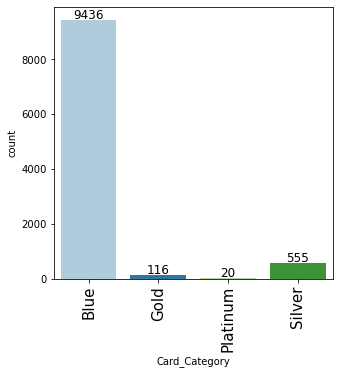

<IPython.core.display.Javascript object>

In [104]:
labeled_barplot(data, "Card_Category")

* 93.2% of the customers have the Blue card.
* Blue card would be a standard card given by the bank to all its customers.

### Observations on Attrition_Flag

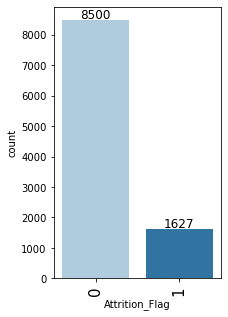

<IPython.core.display.Javascript object>

In [105]:
labeled_barplot(data, "Attrition_Flag")

* 16.1% of the customers attrited.
* This indicates an imbalance in the data.

## Bivariate Analysis

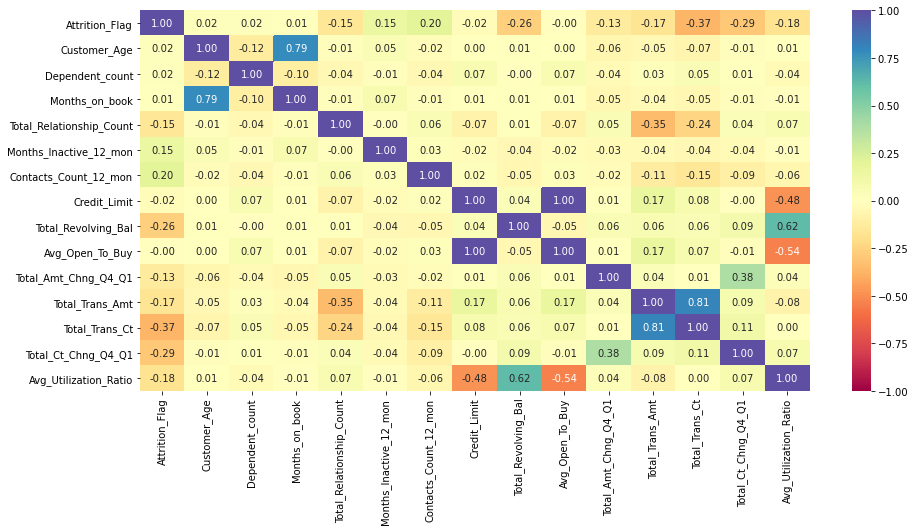

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Attrition_Flag shows a bit of a negative correlation with Total_Trans_Ct (total transactions) and Total_Trans_Amt (total transaction amount).
* There's a strong positive correlation between Months_on_book and Customer_Age, Total_Revolving_Bal and Avg_Utilization_Ratio, Total_Trans_Amt and Total_Trans_Ct.
* There's a negative correlation of Total_Relationship_count with Total_Trans_Amt and Total_Trans_Ct, Avg_Utilization_Ratio with Credit_Limit and Avg_Open_To_Buy.

In [107]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Attrition_Flag vs Gender

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


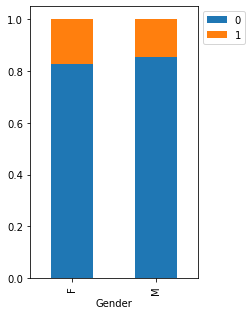

<IPython.core.display.Javascript object>

In [108]:
stacked_barplot(data, "Gender", "Attrition_Flag")

* There's not much difference in attrition percentages for Males and Females.
* ~20% of both Males and Females attrite.

### Attrition_Flag vs Marital_Status

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


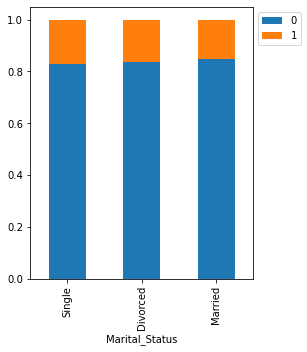

<IPython.core.display.Javascript object>

In [109]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

* There's not much difference in attrition percentages for Marital_Status.
* ~20% of Singles, Divorced attrite.
* Married customers attrite the least.

### Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


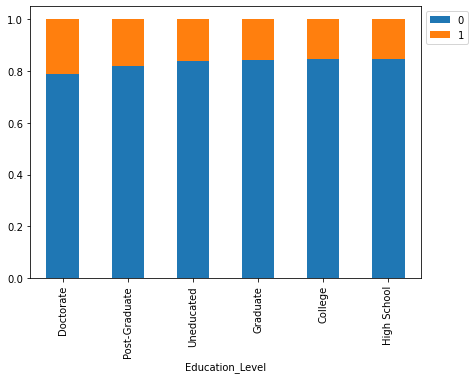

<IPython.core.display.Javascript object>

In [110]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

* Customers with higher education -  Doctorates and Post Graduates are the ones most(~20% for both education levels) attriting.

### Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


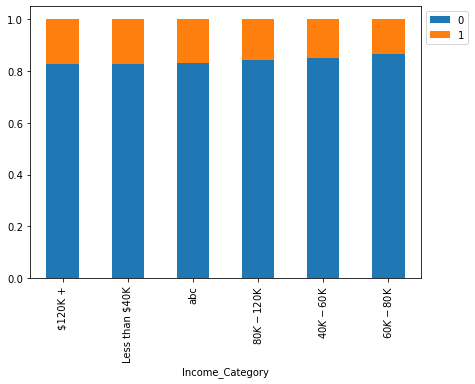

<IPython.core.display.Javascript object>

In [111]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

* The customers from two extreme income groups - Earning less than 40K and Earning more than 120k+ are the ones attriting the most.

### Attrition_Flag vs Card_Category

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


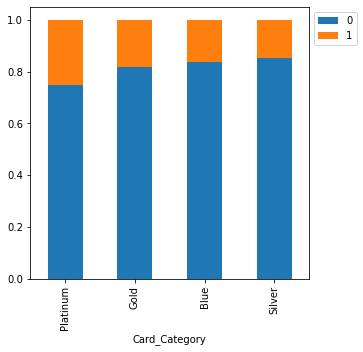

<IPython.core.display.Javascript object>

In [112]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

* ~35% of attrition is amongst the customers with platinum cards followed by ~30% attrition in Gold cards.
* Customers with Platinum and Gold cards are our premium customers and the highest attrition for these customers is alarming as they are using the premium card provided by the bank.

### Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


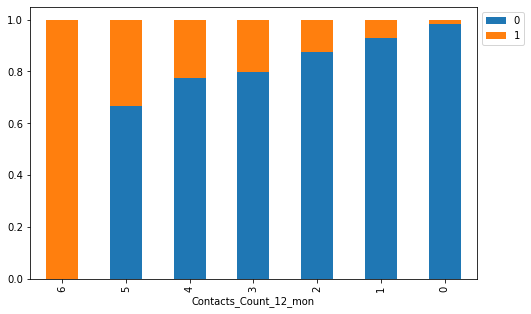

<IPython.core.display.Javascript object>

In [113]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

* Highest attrition is among the customers who interacted the most with the bank.
* This signifies that the bank is not able to resolve the problems faced by customers leading to attrition
* A preliminary step to identify attriting customers would be to look out for customers who have reached out to them repeatedly.

### Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


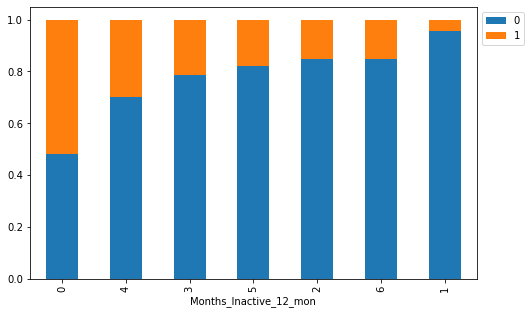

<IPython.core.display.Javascript object>

In [114]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

* As inactivity increases attrition also increases (2-4 months)
* The interpretation from here for 0 months and 6 months is difficult as customers who recently used the card attrited the most while those who were inactive for 6 months attrited less.

### Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


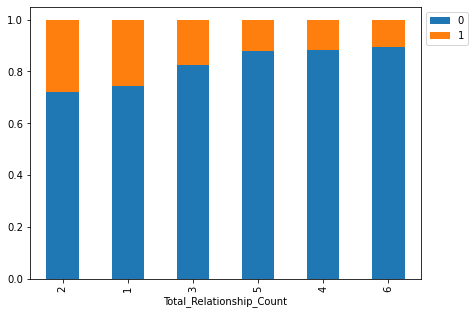

<IPython.core.display.Javascript object>

In [115]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

* Attrition is highest among the customers who are using 1 or 2 products offered by the bank - together they constitute ~55% of the attrition.
* Customers who use more than 3 products are the ones least attriting, such customers might be more financially stable and actively invest in different services provided by the bank.

### Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


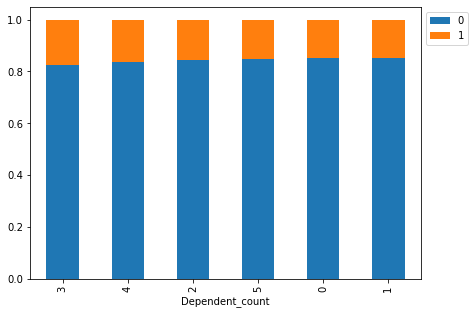

<IPython.core.display.Javascript object>

In [116]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

* More the number of dependents more is the attrition, more responsibilities might lead to financial instability in such customers.
* Attrition is fairly low for customers with 0 or 1 dependents.

In [117]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Attrition_Flag vs Customer_Age

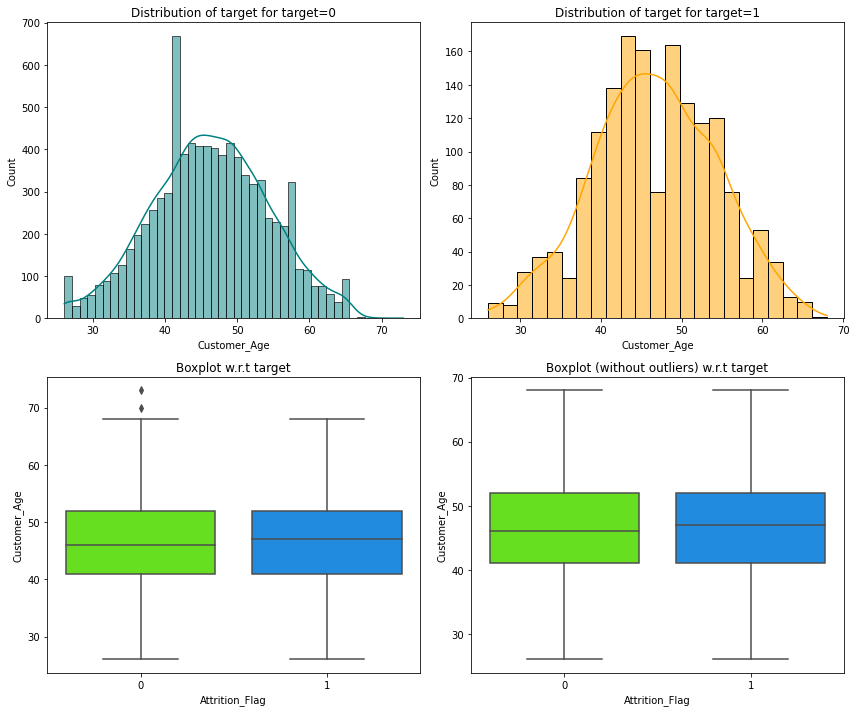

<IPython.core.display.Javascript object>

In [118]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

* There's no difference in the age of customers who attrited and who didn't.

### Attrition_Flag vs Months_on_book

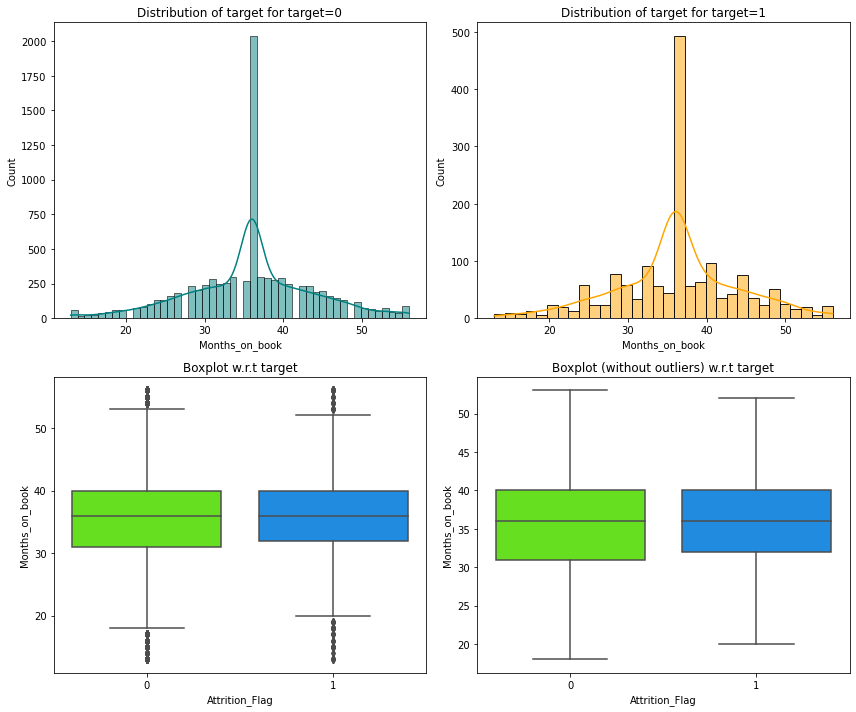

<IPython.core.display.Javascript object>

In [119]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

* Tenure of relationship with the bank doesn't seem to have an impact on attrition.

### Attrition_Flag vs Credit_Limit

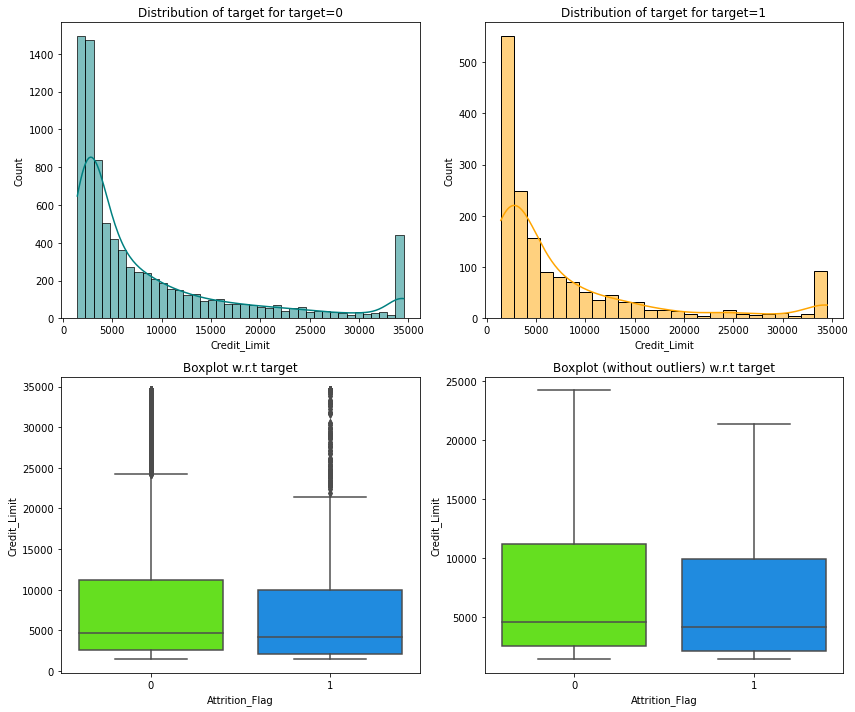

<IPython.core.display.Javascript object>

In [120]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

* Customers with lower credit limits are the ones who attrited.

### Attrition_Flag vs Total_Revolving_Bal

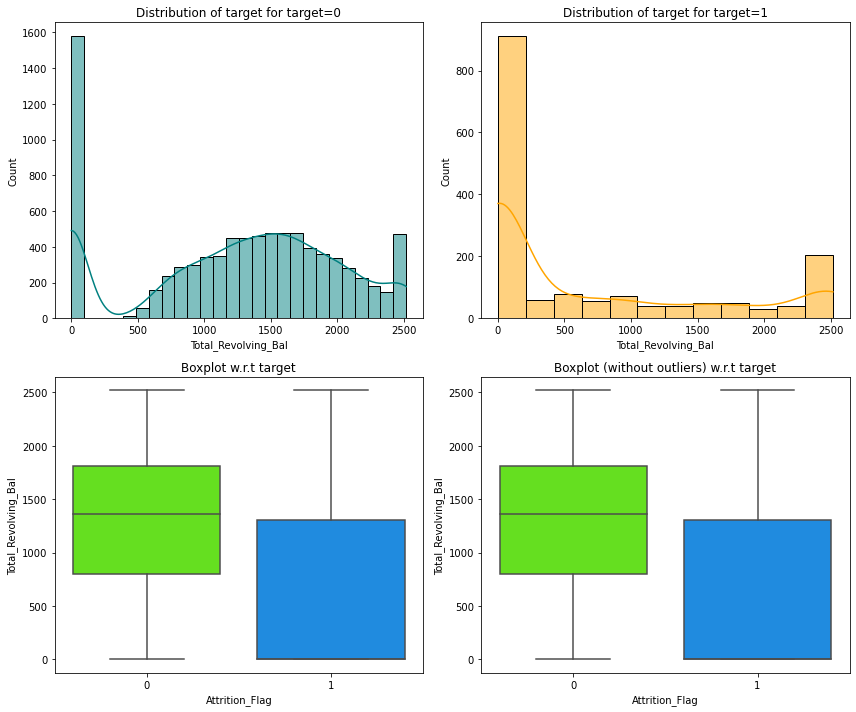

<IPython.core.display.Javascript object>

In [121]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* Customers with less total revolving balance are the ones who attrited, such customers must have cleared their dues and opted out of the credit card service.

### Attrition_Flag vs Avg_Open_To_Buy

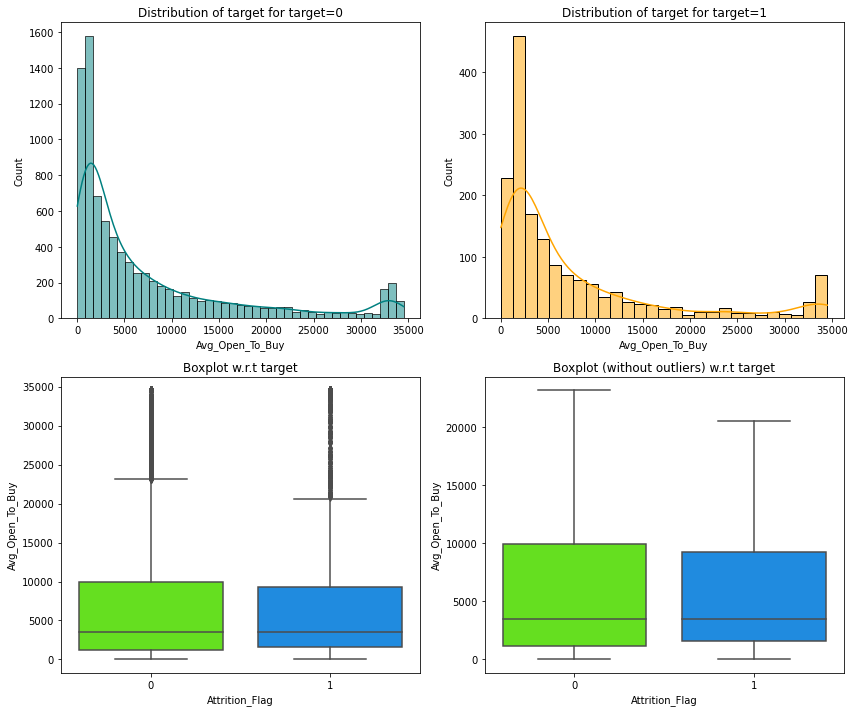

<IPython.core.display.Javascript object>

In [122]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

* There's not much difference in the distribution for an attrited and existing customer.

### Attrition_Flag vs Total_Trans_Ct

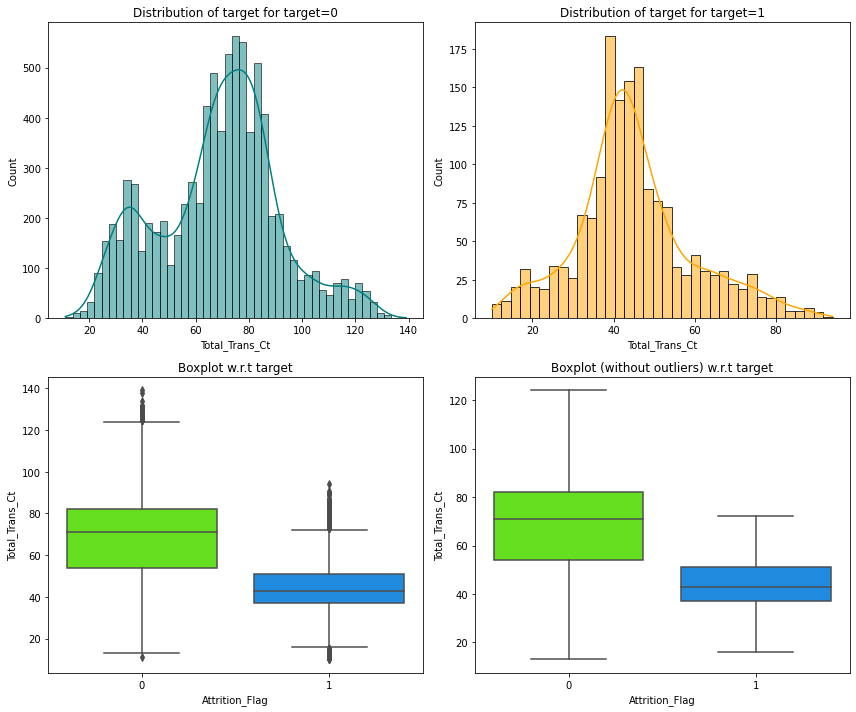

<IPython.core.display.Javascript object>

In [123]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

* Less number of transactions lead to higher attrition.
* Customers with less than 80 to 100 transactions (or median transactions equal to 40) in a year should be more focused upon.

### Attrition_Flag vs Total_Trans_Amt

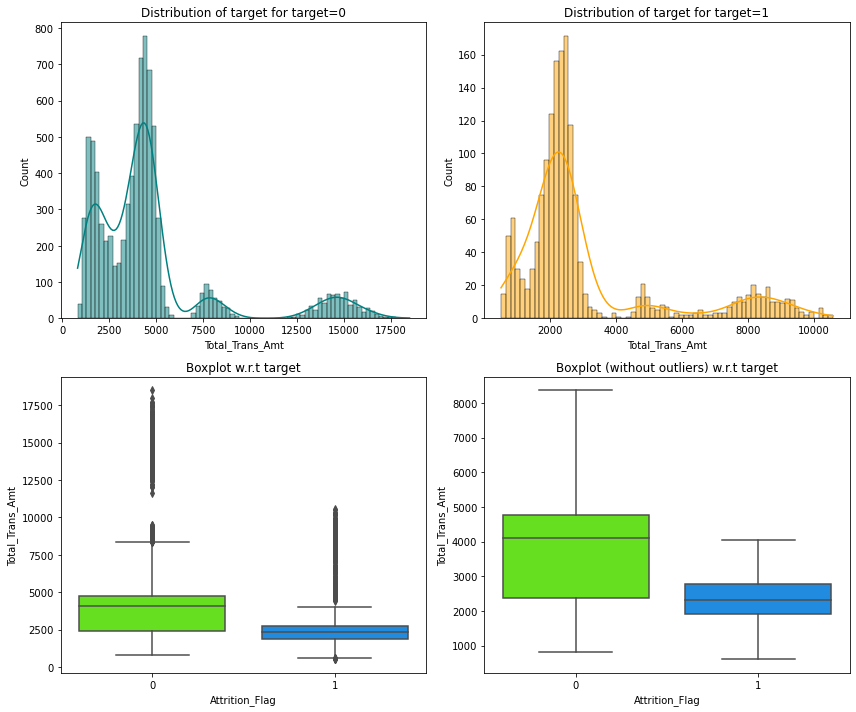

<IPython.core.display.Javascript object>

In [124]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

* Less number of transactions might lead to a less transaction amount and eventually leading to customer attrition.

### Attrition_Flag vs Total_Amt_Chng_Q4_Q1

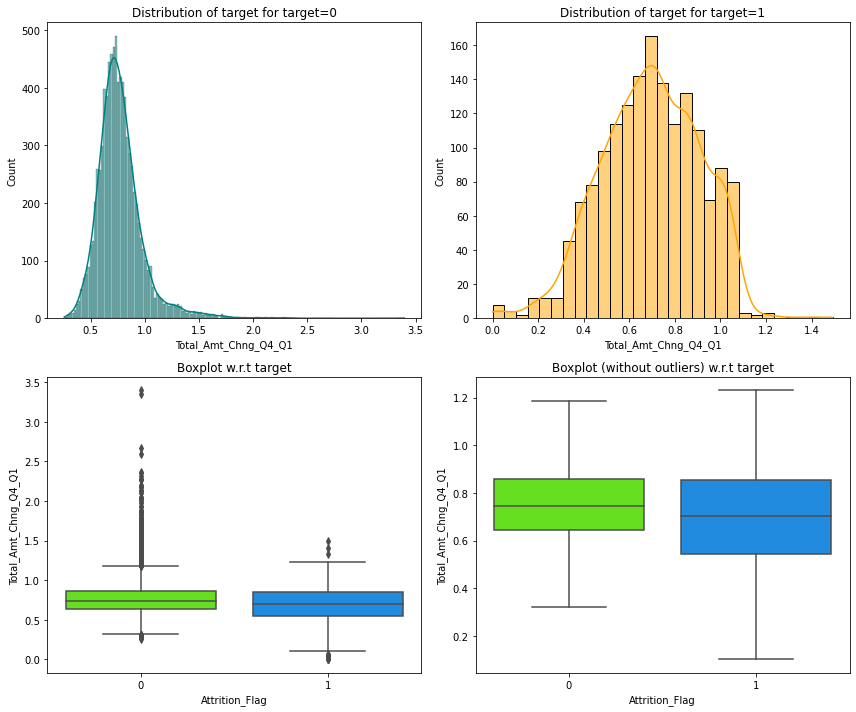

<IPython.core.display.Javascript object>

In [125]:
distribution_plot_wrt_target(data, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

* Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

### Attrition_Flag vs Total_Ct_Chng_Q4_Q1

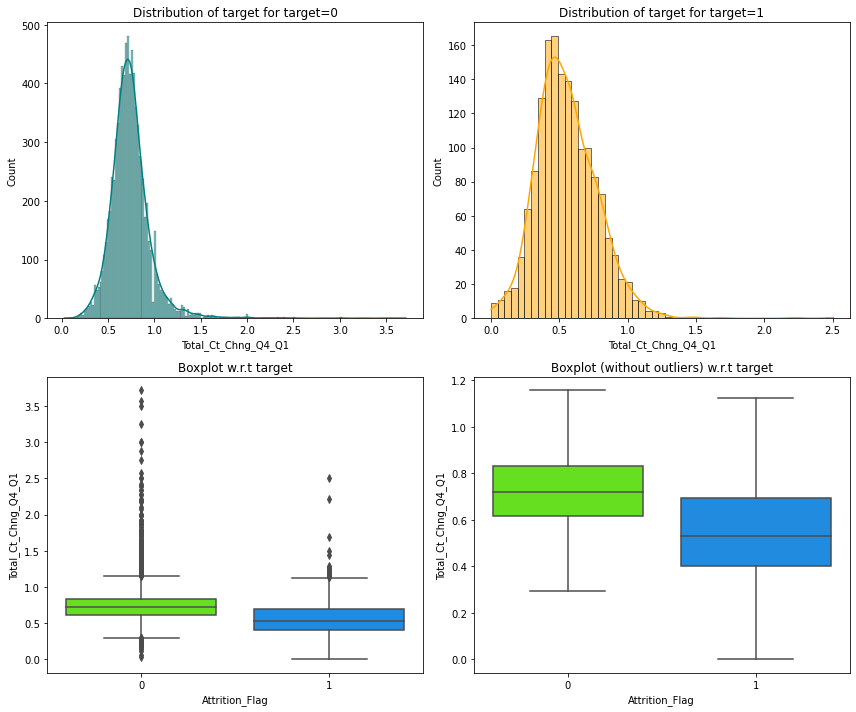

<IPython.core.display.Javascript object>

In [126]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Customers who didn't attrite showed less variability across Q4 to Q1 as compared to the ones who attrited.

### Attrition_Flag vs Avg_Utilization_Ratio

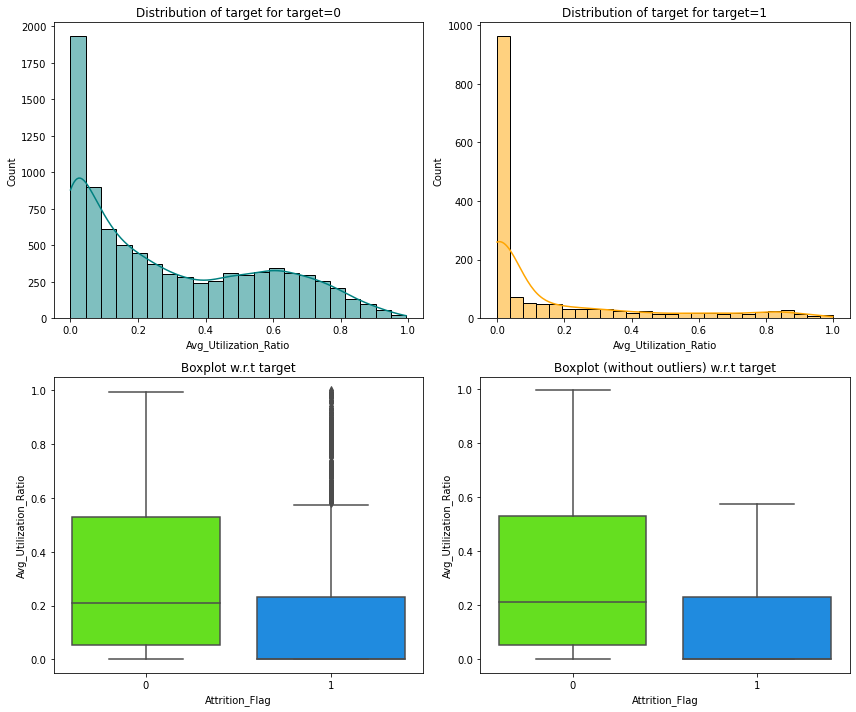

<IPython.core.display.Javascript object>

In [127]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* Customers utilizing their full credit limit are the ones who didn't attrite. 
* Less utilization of the available credits indicates inactivity of customers.

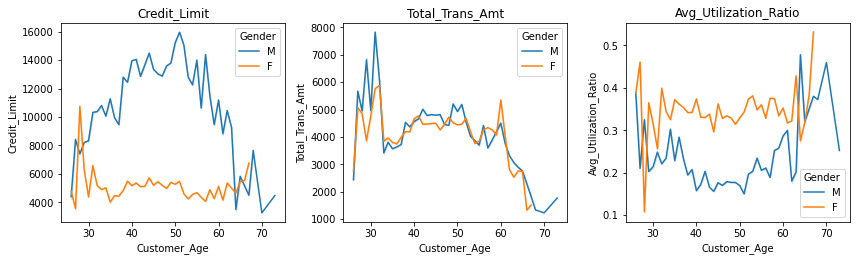

<IPython.core.display.Javascript object>

In [128]:
cols = data[
    ["Credit_Limit", "Total_Trans_Amt", "Avg_Utilization_Ratio"]
].columns.tolist()
plt.figure(figsize=(12, 10))
for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.lineplot(data["Customer_Age"], data[variable], hue=data["Gender"], ci=0)
    plt.tight_layout()
    plt.title(variable)
plt.show()

* With age the credit limit of male customers increased (till 50 years) but for the female customers the credit limit constant throughout.
* Although the credit limit for female customers is less the total transactions made by them for all age groups is the same.
* Female customers utilized their credits more as compared to the male customers where utilization dropped from 30-50 years but increased after 60 years.

### To jump back to the EDA summary section, click [here](#eda).